# DLNLP PROJECT
## Group 8
### Malaria Cell Detection

<b><blockquote> Prachi Joshi - 015009<br>
 Pranav Kalra - 015011<br>
 Allan Vetha - 015020<br>
 Pranshik Arora - 015039<br>
 Aanya Sharma - 015053</blockquote></b>

In [1]:
import numpy as np
import pandas as pd

In [2]:
pwd

'/Users/allan'

In [3]:
import os
os.listdir("/Users/allan/Malaria/cell_images/cell_images/")

['Parasitized', 'Uninfected']

In [4]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, Lambda, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

### Resizing the image & Converting the RGB into an Array


In [5]:
#Resizing the image & Converting the RGB into an Array

IMG_SIZE = 64
category = ['Uninfected', 'Parasitized']
def get_train_data(direct):
    data = []
    for labels in category:
        path = os.path.join(direct, labels)
        class_num = category.index(labels)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
#Path Link
new_data = get_train_data("/Users/allan/Malaria/cell_images/cell_images/")

OpenCV(4.5.3) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-xxsyexfp/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.3) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-xxsyexfp/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-5-adb6c0c6bec7>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


### Append feature and label. Convert label to categorical and Reshape the image with 3 channel i.e R G B


In [7]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)
    
from keras.utils import np_utils
y = np_utils.to_categorical(y, num_classes = 2)

X = np.array(X)
y = np.array(y)

X = X.reshape(-1, 64, 64, 3)

### Test, Train and Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Augmentation

In [9]:
#Data Augmentation

from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

### Transfer Learning - VGG19

In [11]:
#Transfer Learning - Using VGG19

vg19 = VGG19(input_shape=[IMG_SIZE, IMG_SIZE] + [3], weights="imagenet", include_top=False)

for layer in vg19.layers:
    layer.trainable = False

x = Flatten()(vg19.output)
prediction = Dense(len(category), activation="softmax")(x)
model = Model(inputs=vg19.input, outputs=prediction)


model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

80142336/80134624 [==============================] - 13s 0us/step


In [12]:
# Fit Generators
history = model.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 50,
                                   shuffle = False,
                                   validation_data=test_generator, validation_steps=len(test_generator))

/Users/allan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
301/301 [==============================] - 314s 1s/step - loss: 0.4152 - accuracy: 0.8155 - val_loss: 0.3063 - val_accuracy: 0.8869
Epoch 2/50
301/301 [==============================] - 315s 1s/step - loss: 0.3185 - accuracy: 0.8693 - val_loss: 0.2745 - val_accuracy: 0.8982
Epoch 3/50
301/301 [==============================] - 317s 1s/step - loss: 0.2984 - accuracy: 0.8798 - val_loss: 0.2610 - val_accuracy: 0.9009
Epoch 4/50
301/301 [==============================] - 318s 1s/step - loss: 0.2925 - accuracy: 0.8814 - val_loss: 0.2531 - val_accuracy: 0.9037
Epoch 5/50
301/301 [==============================] - 321s 1s/step - loss: 0.2860 - accuracy: 0.8865 - val_loss: 0.2534 - val_accuracy: 0.8999
Epoch 6/50
301/301 [==============================] - 324s 1s/step - loss: 0.2855 - accuracy: 0.8843 - val_loss: 0.2463 - val_accuracy: 0.9151
Epoch 7/50
301/301 [==============================] - 325s 1s/step - loss: 0.2841 - accuracy: 0.8861 - val_loss: 0.2422 - val_accuracy: 0.9150

In [13]:
#Evaluate Test Generator

model.evaluate_generator(test_generator)


/Users/allan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.21554844081401825, 0.920536994934082]

### Visualization

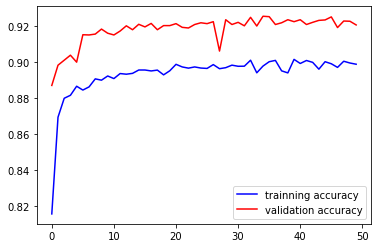

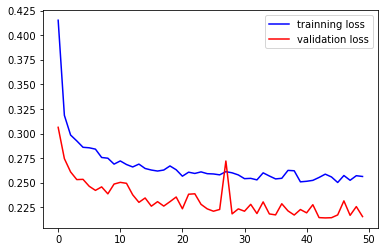

In [14]:
#Visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(test_generator)
y_pred

array([[8.5577714e-01, 1.4422292e-01],
       [6.0702574e-01, 3.9297426e-01],
       [1.0358982e-02, 9.8964101e-01],
       ...,
       [8.8638067e-04, 9.9911362e-01],
       [4.9580881e-01, 5.0419128e-01],
       [8.8823992e-01, 1.1176009e-01]], dtype=float32)

In [16]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [17]:
#Saving the Model

model.save("new.model")

INFO:tensorflow:Assets written to: new.model/assets


In [18]:
import tensorflow as tf
category = ['Uninfected', 'Parasitized']
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("new.model")

In [19]:
#Uninfected Cell

prediction = model.predict([prepare("/Users/allan/Malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_25.png")])

if np.argmax(prediction) == 1:
    print("Infected")
else:
    print("Uninfected")

Uninfected


In [21]:
#Infected Cell

prediction = model.predict([prepare("/Users/allan/Malaria/cell_images/Parasitized/C33P1thinF_IMG_20150619_120742a_cell_210.png")])

if np.argmax(prediction) == 1:
    print("Infected")
else:
    print("Uninfected")

Infected


In [22]:
#Classification Report

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=category))

              precision    recall  f1-score   support

  Uninfected       0.89      0.96      0.92      4146
 Parasitized       0.96      0.88      0.92      4122

    accuracy                           0.92      8268
   macro avg       0.92      0.92      0.92      8268
weighted avg       0.92      0.92      0.92      8268



In [23]:
model.save("hh.h5")

### CNN

In [25]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

### Displaying the Uninfected and the Infected Cell Tissues

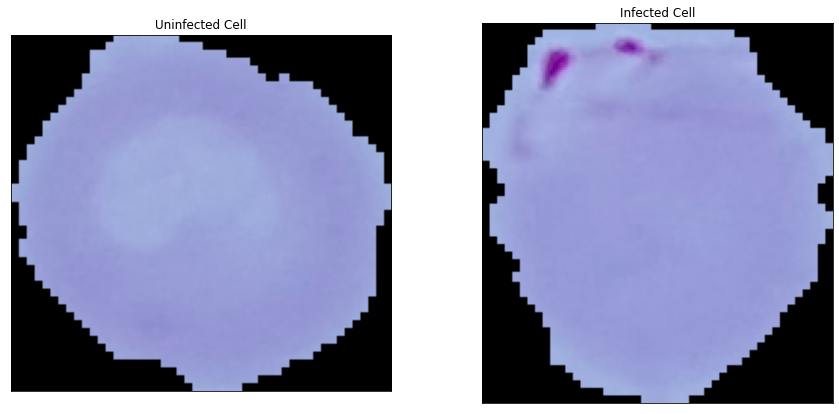

In [26]:
upic='/Users/allan/Malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
apic='/Users/allan/Malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [27]:
width = 128
height = 128

### Dividing the dataset into two - Train & Test

In [28]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

### Preparing the Train & Test Image Generator

In [30]:
trainDatagen = datagen.flow_from_directory(directory='/Users/allan/Malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [31]:
valDatagen = datagen.flow_from_directory(directory='/Users/allan/Malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


### Preparing Model

In [32]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [36]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

/Users/allan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1378/1378 [==============================] - 128s 92ms/step - loss: 0.4875 - accuracy: 0.7482 - val_loss: 0.2071 - val_accuracy: 0.9270
Epoch 2/20
1378/1378 [==============================] - 129s 94ms/step - loss: 0.1949 - accuracy: 0.9372 - val_loss: 0.1623 - val_accuracy: 0.9401
Epoch 3/20
1378/1378 [==============================] - 124s 90ms/step - loss: 0.1663 - accuracy: 0.9491 - val_loss: 0.1739 - val_accuracy: 0.9439
Epoch 4/20
1378/1378 [==============================] - 129s 93ms/step - loss: 0.1568 - accuracy: 0.9522 - val_loss: 0.1608 - val_accuracy: 0.9374
Epoch 5/20
1378/1378 [==============================] - 130s 94ms/step - loss: 0.1467 - accuracy: 0.9549 - val_loss: 0.1841 - val_accuracy: 0.9452
Epoch 6/20
1378/1378 [==============================] - 132s 96ms/step - loss: 0.1413 - accuracy: 0.9559 - val_loss: 0.1678 - val_accuracy: 0.9439


### Visualization

In [43]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

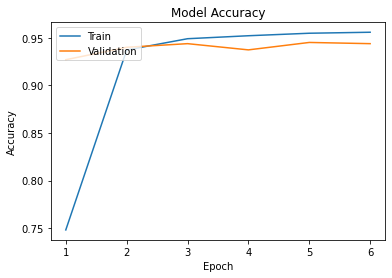

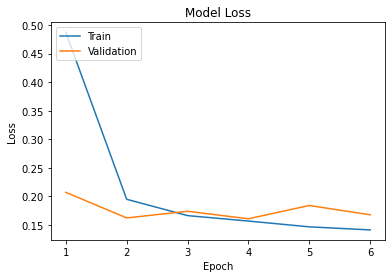

In [46]:
plotLearningCurve(history,6)